## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Series, DataFrame
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings(action="ignore")

## Importing dataset

In [2]:
df=pd.read_csv("ProjectData.csv")
df.head()

,date,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HPLR,HCCR
0,1986-01,5.482456,11.13,11.2,12.86300,8.25,156383.84,1.42,9.70,23.68,26.8
1,1986-02,5.114254,10.73,11.1,12.71875,7.94,157953.04,1.43,9.99,23.68,26.8
2,1986-03,4.202586,9.69,11.2,11.77679,7.50,159977.18,1.47,9.14,23.68,26.8
3,1986-04,3.059072,8.94,11.3,10.57670,6.94,164349.56,1.50,7.82,23.68,26.8
4,1986-05,2.731092,9.15,11.3,10.26705,7.13,165909.12,1.52,7.48,23.68,26.8


In [3]:
df['date']=pd.to_datetime(df['date'])
df.set_index('date',inplace=True)
df.head()

,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HPLR,HCCR
date,,,,,,,,,,
1986-01-01,5.482456,11.13,11.2,12.86300,8.25,156383.84,1.42,9.70,23.68,26.8
1986-02-01,5.114254,10.73,11.1,12.71875,7.94,157953.04,1.43,9.99,23.68,26.8
1986-03-01,4.202586,9.69,11.2,11.77679,7.50,159977.18,1.47,9.14,23.68,26.8
1986-04-01,3.059072,8.94,11.3,10.57670,6.94,164349.56,1.50,7.82,23.68,26.8
1986-05-01,2.731092,9.15,11.3,10.26705,7.13,165909.12,1.52,7.48,23.68,26.8


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 373 entries, 1986-01-01 to 2017-01-01
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Inflation     373 non-null    float64
 1   LTIR          373 non-null    float64
 2   Unemployment  373 non-null    float64
 3   STIR          373 non-null    float64
 4   LIBOR         373 non-null    float64
 5   BCTPS         373 non-null    float64
 6   UKUSFX        373 non-null    float64
 7   BDR           373 non-null    float64
 8   HPLR          373 non-null    float64
 9   HCCR          373 non-null    float64
dtypes: float64(10)
memory usage: 32.1 KB


In [5]:
df.describe()

,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HPLR,HCCR
count,373.000000,373.00000,373.000000,373.000000,373.000000,3.730000e+02,373.000000,373.000000,373.000000,373.000000
mean,2.809570,5.90481,7.115818,5.658756,3.795416,9.727682e+05,1.636729,3.505255,13.245871,20.275871
std,1.792556,2.88402,1.877582,3.995817,2.800895,5.827473e+05,0.158486,2.915409,6.657344,4.388978
min,0.200000,0.74210,4.600000,0.362100,0.150000,1.563838e+05,1.230000,0.370000,3.680000,14.800000
25%,1.600000,3.88710,5.300000,1.534130,0.530000,4.374972e+05,1.530000,1.060000,7.850000,16.530000
50%,2.400000,5.06500,6.900000,5.551260,4.090000,8.253460e+05,1.610000,2.840000,11.710000,18.230000
75%,3.300000,8.32000,8.300000,7.356150,5.880000,1.692210e+06,1.720000,3.720000,19.550000,23.040000
max,9.200000,12.74000,11.300000,15.316760,10.060000,1.908201e+06,2.070000,11.820000,26.550000,29.940000


## Exploratory Data Analysis

In [6]:
cor= df.corr()

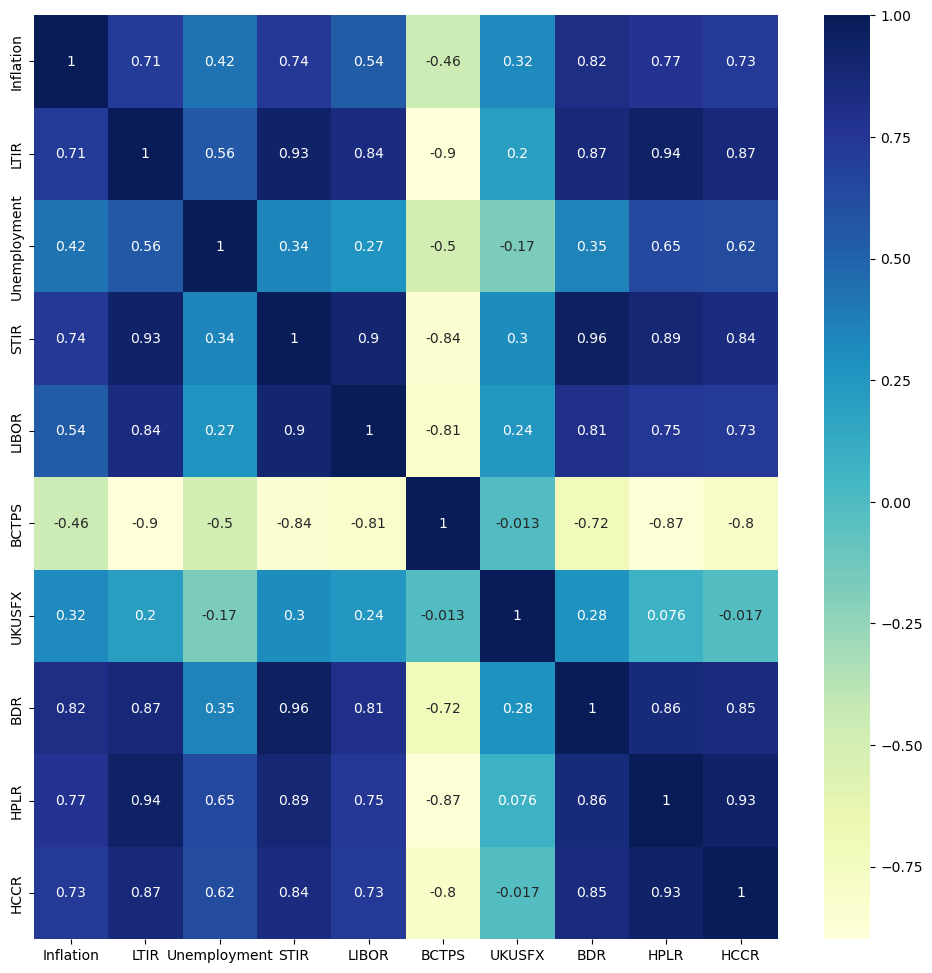

In [7]:
plt.figure(figsize=(12,12))
heatmap = sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

In [8]:
# Checking null values in dataset
df.isnull().sum().sort_values(ascending=False).head()

Inflation       0
LTIR            0
Unemployment    0
STIR            0
LIBOR           0
dtype: int64

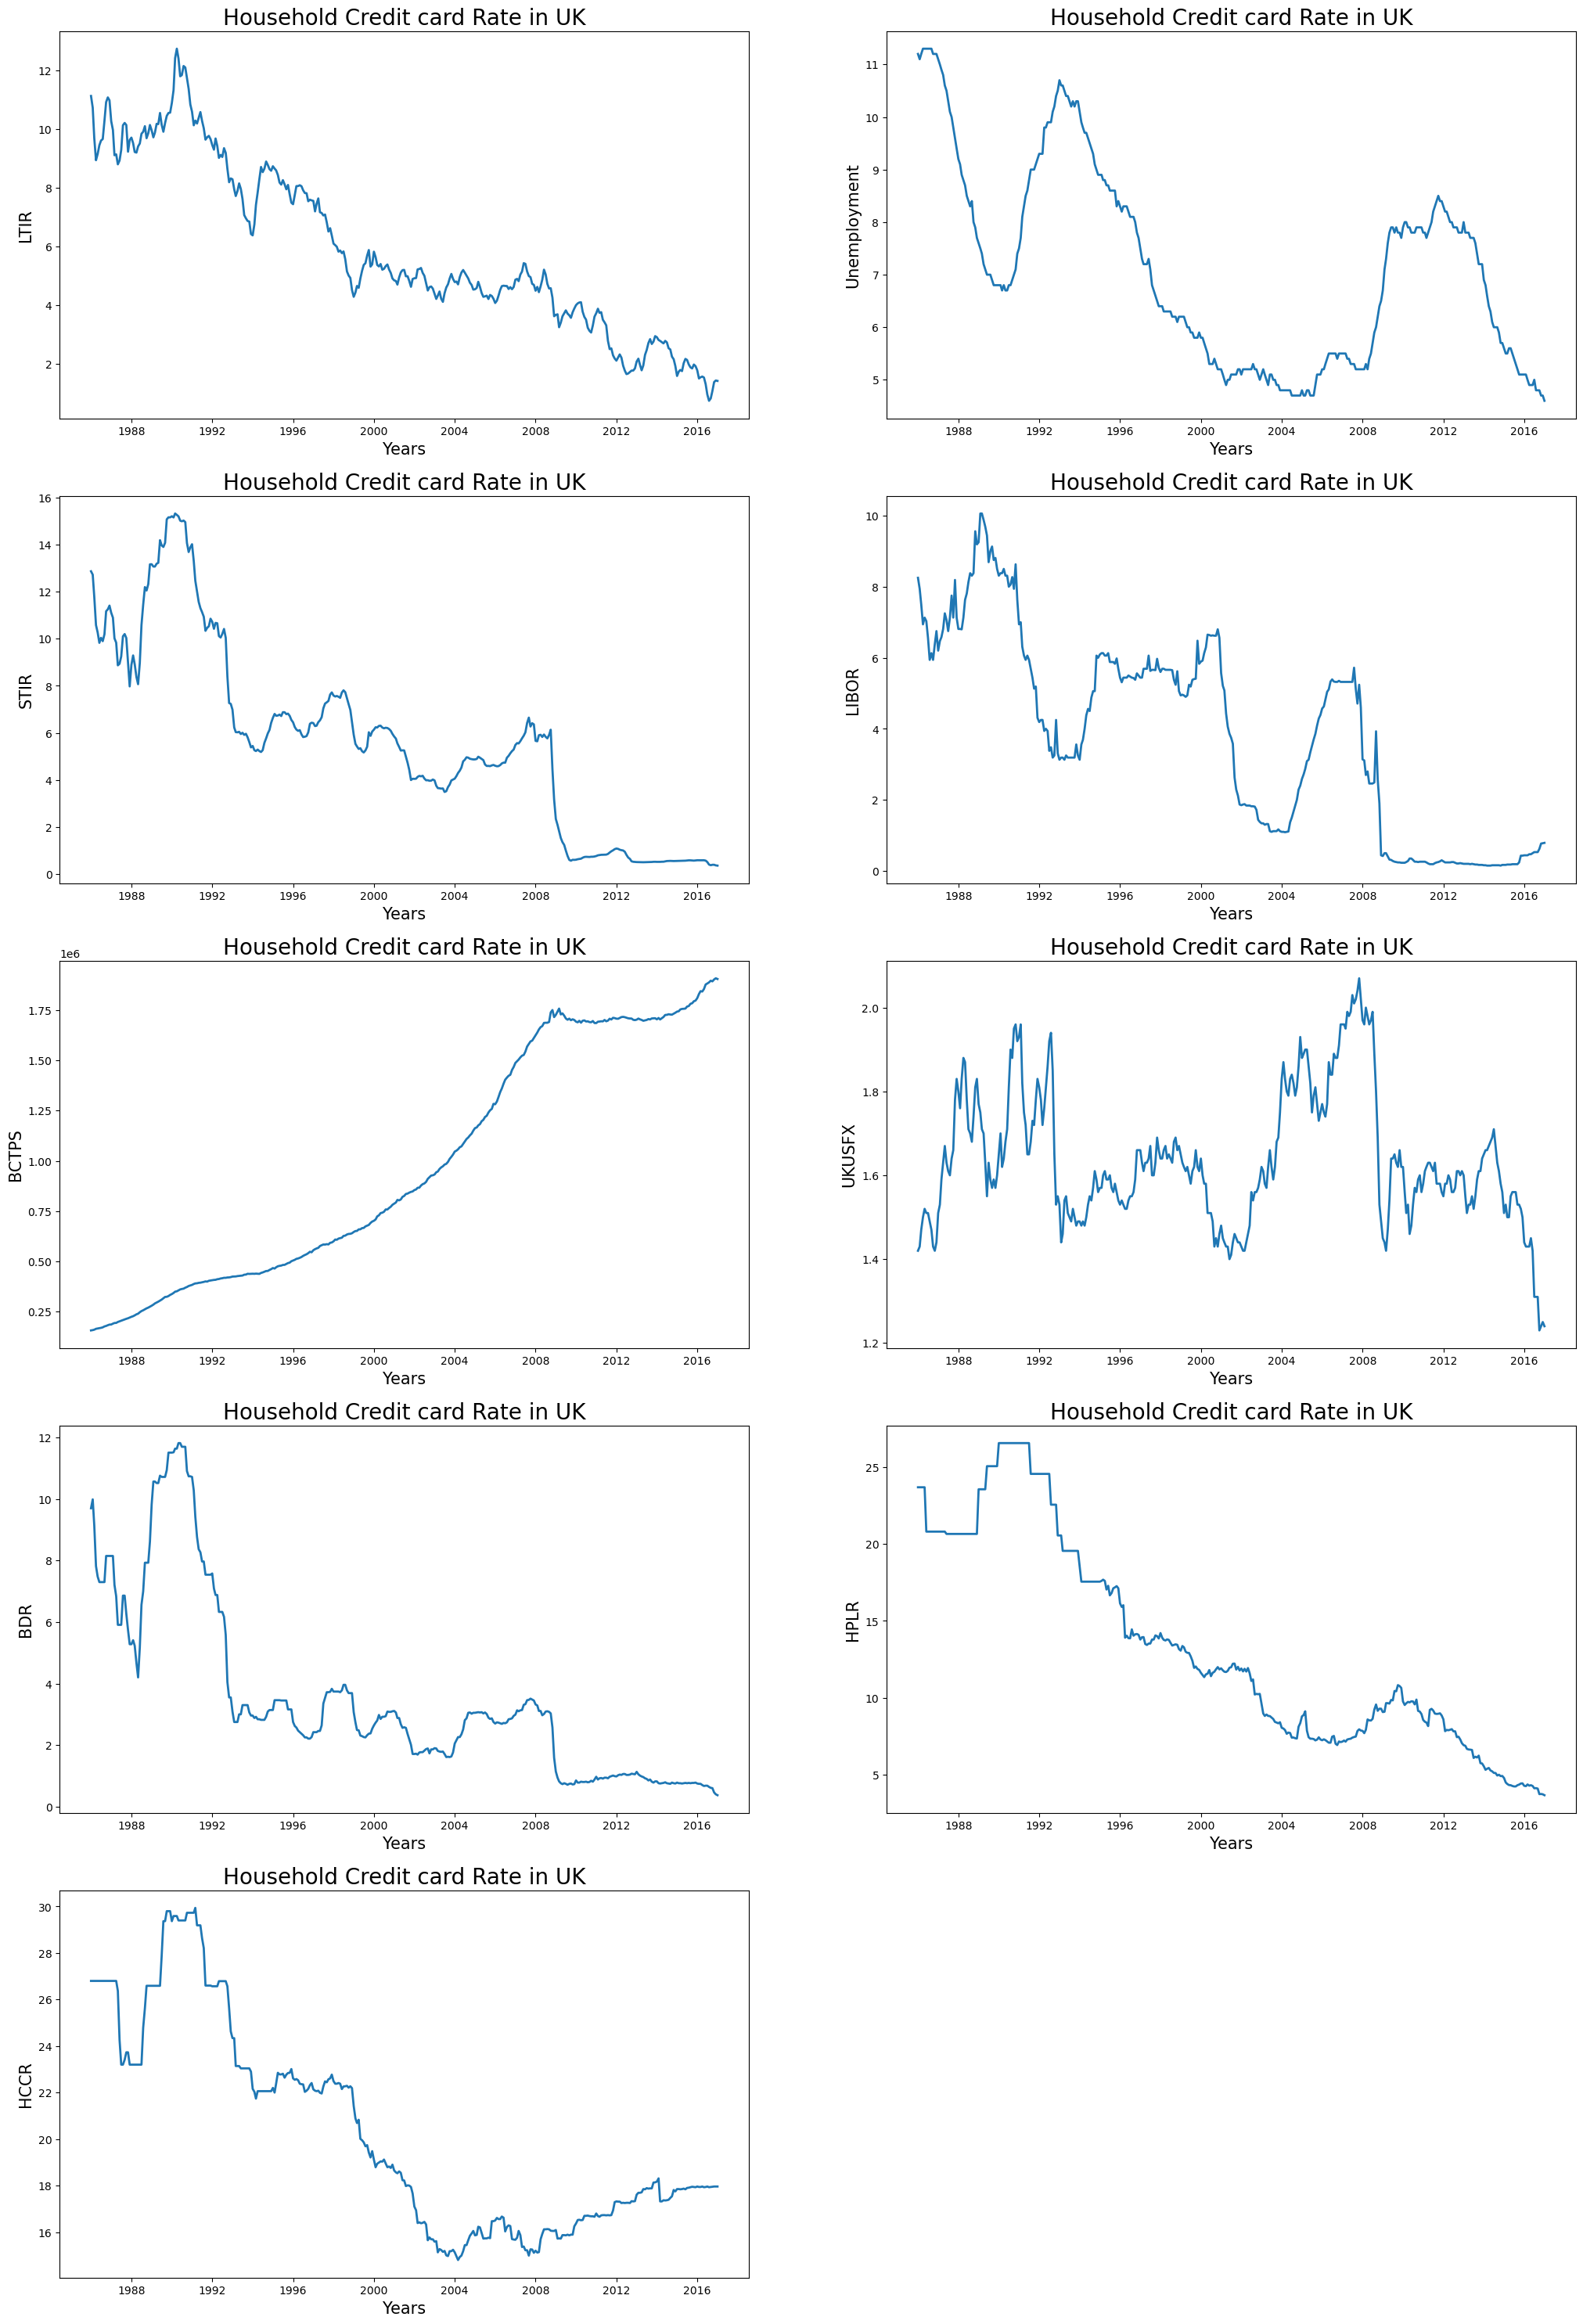

In [9]:
plt.figure(figsize=(25,45))
columns = df.columns[1:]
for cols in enumerate(columns):
    if cols[0]<11:
        ax = plt.subplot(6,2,cols[0]+1)
        plt.plot(df[cols[1]], label=cols[1],linewidth=2)
        plt.xlabel('Years',size =15)
        plt.ylabel(cols[1],size=15)
        plt.title("Household Credit card Rate in UK",size=20)
plt.savefig("graphs.png")
plt.show()    

## Normalization

In [10]:
features = ['Inflation', 'LTIR', 'Unemployment', 'STIR', 'LIBOR', 'BCTPS', 'UKUSFX', 'BDR', 'HCCR']
target=['HPLR']
x = df.loc[:, features].values
Y = df.loc[:, target].values
x= StandardScaler().fit_transform(x)
normalised_Data=pd.DataFrame(x,columns=features)
normalised_Data.head()

,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HCCR
0,1.493106,1.814207,2.178157,1.805368,1.592551,-1.402805,-1.369336,2.127683,1.488477
1,1.287424,1.675325,2.124825,1.769219,1.481723,-1.400109,-1.306154,2.227288,1.488477
2,0.778155,1.314233,2.178157,1.533166,1.324420,-1.396631,-1.053426,1.935342,1.488477
3,0.139375,1.053830,2.231489,1.232426,1.124215,-1.389117,-0.863881,1.481968,1.488477
4,-0.043839,1.126743,2.231489,1.154828,1.192142,-1.386438,-0.737517,1.365189,1.488477


## PCA

In [11]:
pca_Data= PCA()
principalComponents_Data=pca_Data.fit_transform(normalised_Data)
principal_Data_Df=pd.DataFrame(data = principalComponents_Data,
                               columns = ['principalcomponent_'+str(i) for i in range(x.shape[1])])
principal_Data_Df.head()

,principalcomponent_0,principalcomponent_1,principalcomponent_2,principalcomponent_3,principalcomponent_4,principalcomponent_5,principalcomponent_6,principalcomponent_7,principalcomponent_8
0,4.675165,-1.813109,-0.221014,0.521891,-0.509151,-0.334325,0.886708,-0.148505,0.033574
1,4.532450,-1.768173,-0.160990,0.486962,-0.454956,-0.123141,0.968021,-0.234743,-0.022576
2,4.001577,-1.765530,-0.097981,0.063215,-0.464309,0.220377,0.816008,-0.359650,-0.022601
3,3.359947,-1.871278,0.032888,-0.453789,-0.427066,0.543542,0.623915,-0.339026,-0.004866
4,3.289622,-1.826150,0.116558,-0.664487,-0.465168,0.587345,0.572375,-0.222140,-0.037511


In [12]:
print("explained_variance_ :",pca_Data.explained_variance_)

explained_variance_ : [6.10672041 1.33401476 0.74865744 0.47037752 0.13577872 0.10591228
 0.07830348 0.03349974 0.01092919]


In [13]:
print("explained_variance_ratio_ :",pca_Data.explained_variance_ratio_*100)

explained_variance_ratio_ : [67.67053892 14.78264791  8.29611462  5.21240509  1.50460783  1.17364819
  0.86770608  0.37122143  0.12110994]


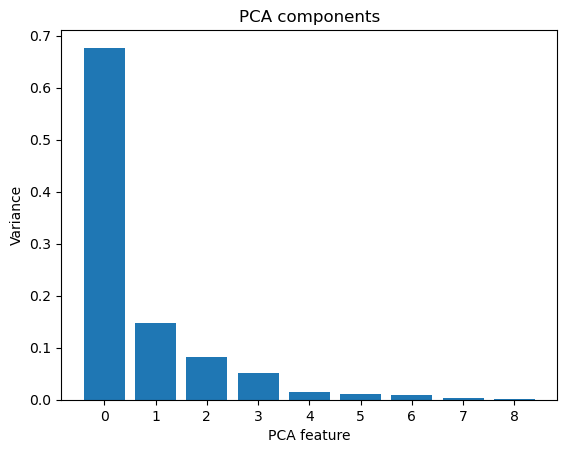

In [14]:
features=range(pca_Data.n_components_)
plt.bar(features,pca_Data.explained_variance_ratio_)
plt.xlabel('PCA feature')
plt.ylabel('Variance')
plt.title('PCA components')
plt.xticks(features)
plt.show()

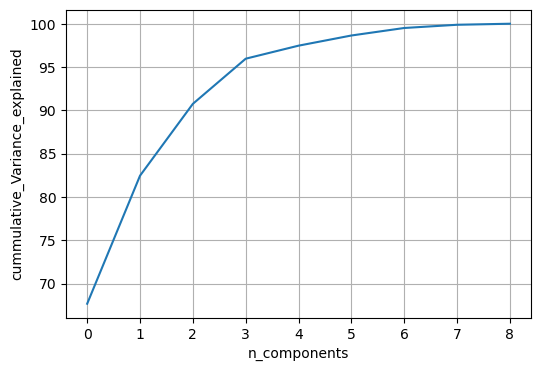

In [15]:
variance_ratio_df=pd.DataFrame(data=pca_Data.explained_variance_ratio_)
variance_ratio_df=variance_ratio_df*100
sum_variance_ratio=np.cumsum(variance_ratio_df)
plt.figure(figsize=(6,4))
plt.plot(sum_variance_ratio)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('cummulative_Variance_explained')
plt.show()

In [16]:
principals_Data_Df = principal_Data_Df.iloc[:,0:4]
final_principalcomponent=pd.concat([principals_Data_Df,df[['HPLR']]],axis=1)

In [17]:
PC1=principalComponents_Data[:,0]
PC2=principalComponents_Data[:,1]
PC3=principalComponents_Data[:,2]
PC4=principalComponents_Data[:,3]

Text(0.5, 1.0, 'pc1 vs pc2')

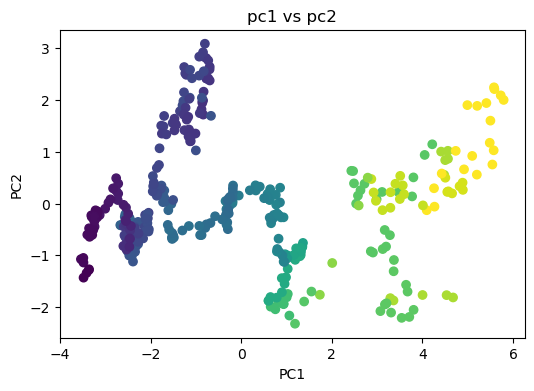

In [18]:
plt.figure(figsize=(6,4))
plt.scatter(PC1, PC2,c=Y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('pc1 vs pc2')

In [19]:
x1 = principals_Data_Df.copy()
x1 = x1.values
y1=df['HPLR']
y1 = y1.values

## Regression Algorithms

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn import ensemble
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
import statsmodels.api as sm

In [21]:
Models=['multiple linear regression','polynomial regression','decision tree regression','random forest regression']
train_rm={}
test_rm={}
rsquare_train={}
rsquare_test={}

### Linear Regression

In [22]:
X_train,X_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30)
model=LinearRegression()
model.fit(X_train,y_train)
print(model.intercept_)
print(model.coef_)

13.228153677645393
[ 2.59323556 -1.00137673 -0.67524192 -0.05364935]


In [23]:
y_pred_train=model.predict(X_train)
y_actual_train=y_train
rm_MLR_train=np.sqrt(mean_squared_error(y_actual_train,y_pred_train))
print('rm_MLR_train:',rm_MLR_train)
r2_MLR_train=model.score(X_train,y_train)
print('r2_MLR_train',model.score(X_train,y_train))
train_rm['MLR']=rm_MLR_train
rsquare_train['MLR']=r2_MLR_train

rm_MLR_train: 1.4555295848216971
r2_MLR_train 0.9560261960692251


In [24]:
y_pred_test=model.predict(X_test)
y_actual_test=y_test
rm_MLR_test=np.sqrt(mean_squared_error(y_actual_test,y_pred_test))
print('rm_MLR_test:',rm_MLR_test)
r2_MLR_test=model.score(X_test,y_test)
print('r2_MLR_test',model.score(X_test,y_test))
test_rm['MLR']=rm_MLR_test
rsquare_test['MLR']=r2_MLR_test

rm_MLR_test: 1.3789002267447408
r2_MLR_test 0.9448719700581337


In [25]:
from sklearn.metrics import r2_score
r2=r2_score(y_test,y_pred_test)
r2_train=model.score(X_train,y_train)
r2_test=model.score(X_test,y_test)
print("r2", r2)
print("r2_train", r2_train)
print("r2_test", r2_test)

r2 0.9448719700581337
r2_train 0.9560261960692251
r2_test 0.9448719700581337


<Figure size 1600x800 with 0 Axes>

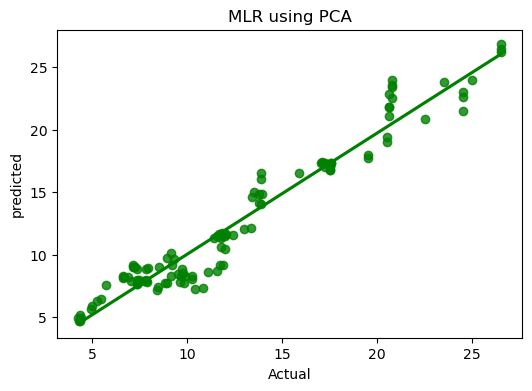

<Figure size 1600x800 with 0 Axes>

In [26]:
plt.figure(figsize=(6,4))
sns.regplot(x=y_test,y=y_pred_test,ci=None,color='green')
plt.xlabel("Actual")
plt.ylabel("predicted")
plt.title("MLR using PCA")
plt.figure(figsize=(16,8))

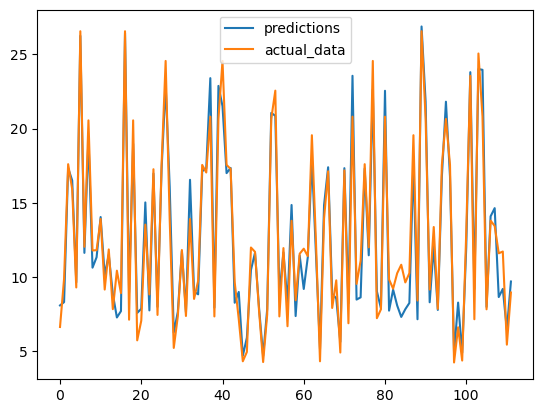

In [27]:
x = np.arange(112)
y_1 = y_pred_test
y_2 = y_test
plt.plot(x, y_1, label='predictions')
plt.plot(x, y_2, label='actual_data')
plt.legend()
plt.show()

In [28]:
df1=pd.DataFrame({"Actual":y_test.flatten(),"predicted":y_pred_test.flatten()})
df1

,Actual,predicted
0,6.64,8.091725
1,9.89,8.313883
2,17.60,17.339293
3,15.91,16.503364
4,9.30,9.647273
...,...,...
107,13.44,14.640977
108,11.60,8.654867
109,11.72,9.202504
110,5.45,6.462209


In [29]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_test))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error: 1.0987813509173485
Mean Squared Error: 1.9013658353166976
Root Mean Squared Error: 1.3789002267447408


In [30]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_train, y_pred_train))
print('Mean Squared Error:', metrics.mean_squared_error(y_train, y_pred_train))
print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_train, y_pred_train)))

Mean Absolute Error: 1.1673039878974611
Mean Squared Error: 2.118566372291222
Root Mean Squared Error: 1.4555295848216971


### Polynomial Regression

In [31]:
model_poly = PolynomialFeatures(degree = 3)
X_train_pr = model_poly.fit_transform(X_train)
X_test_pr = model_poly.fit_transform(X_test)
model2 = LinearRegression()
model2.fit(X_train_pr,y_train)

LinearRegression()

In [32]:
y_pred_pr_train=model2.predict(X_train_pr)
rm_pr_train=np.sqrt(mean_squared_error(y_train,y_pred_pr_train))
print('rmsq_pr_train:',rm_pr_train)
print('r-squared_pr_train',model2.score(X_train_pr,y_train))
rsq_pr_train=model2.score(X_train_pr,y_train)
train_rm['PR']=rm_pr_train
rsquare_train['PR']=rsq_pr_train

rmsq_pr_train: 0.7331781139279294
r-squared_pr_train 0.9888423959404833


In [33]:
y_pred_pr_test=model2.predict(X_test_pr)
rm_pr_test=np.sqrt(mean_squared_error(y_test,y_pred_pr_test))
print('rmsq_pr_test:',rm_pr_test)
print('r-squared_pr_test',model2.score(X_test_pr,y_test))
rsq_pr_test=model2.score(X_test_pr,y_test)
test_rm['PR']=rm_pr_test
rsquare_test['PR']=rsq_pr_test

rmsq_pr_test: 0.6942720838516779
r-squared_pr_test 0.9860245373885073


## DecisionTreeRegressor

In [34]:
dtrg = DecisionTreeRegressor(max_depth=30)
dtrg.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=30)

In [35]:
dtrg_y_pred_train=dtrg.predict(X_train)
rm_dtrg_train=np.sqrt(mean_squared_error(y_train,dtrg_y_pred_train))
print('rm_dtrg__train:',rm_dtrg_train)
print('r-squared_dtrg_train',dtrg.score(X_train,y_train))
rsq_dtrg_train=dtrg.score(X_train,y_train)
train_rm["DT"]=rm_dtrg_train
rsquare_train["DT"]=rsq_dtrg_train

rm_dtrg__train: 1.8917154652490335e-15
r-squared_dtrg_train 1.0


In [36]:
dtrg_y_pred_test=dtrg.predict(X_test)
rm_dtrg_test=np.sqrt(mean_squared_error(y_test,dtrg_y_pred_test))
print('rm_dtrg__test:',rm_dtrg_test)
print('r-squared_dtrg_test',dtrg.score(X_test,y_test))
rsq_dtrg_test=dtrg.score(X_test,y_test)
test_rm["DT"]=rm_dtrg_test
rsquare_test["DT"]=rsq_dtrg_test

rm_dtrg__test: 0.9609612003465221
r-squared_dtrg_test 0.9732256773428792


### RandomForestRegressor

In [37]:
rfrg = RandomForestRegressor(max_features=4, n_estimators=10)
rfrg.fit(X_train,y_train)
rfrg_y_pred_train=rfrg.predict(X_train)
rm_rfrg_train=np.sqrt(mean_squared_error(y_train,rfrg_y_pred_train))
print('rm_rfrg__train:',rm_rfrg_train)
print('r-squared_rfrg_train',rfrg.score(X_train,y_train))
rsq_rfrg_train=rfrg.score(X_train,y_train)
train_rm["DT"]=rm_rfrg_train
rsquare_train["DT"]=rsq_rfrg_train

rm_rfrg__train: 0.4313042280858732
r-squared_rfrg_train 0.9961388258295706


In [38]:
rfrg_y_pred_test=rfrg.predict(X_test)
rm_rfrg_test=np.sqrt(mean_squared_error(y_test,rfrg_y_pred_test))
print('rm_rfrg__test:',rm_rfrg_test)
print('r-squared_rfrg_test',rfrg.score(X_test,y_test))
rsq_rfrg_test=rfrg.score(X_test,y_test)
test_rm["DT"]=rm_rfrg_test
rsquare_test["DT"]=rsq_rfrg_test

rm_rfrg__test: 0.9186130850363498
r-squared_rfrg_test 0.9755334890306918


## OLS Method

In [39]:
X=df[['HCCR','LTIR','STIR','BDR']]
y=df['HPLR']
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   HPLR   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1461.
Date:                Fri, 30 Dec 2022   Prob (F-statistic):          2.57e-224
Time:                        14:18:19   Log-Likelihood:                -708.81
No. Observations:                 373   AIC:                             1428.
Df Residuals:                     368   BIC:                             1447.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.7194      0.610    -12.659      0.0

### Time Series Analysis

In [40]:
from statsmodels.tsa.stattools import adfuller

In [41]:
test_result=adfuller(df['HPLR'])

In [42]:
def adfuller_test(HPLR):
    result=adfuller(HPLR)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [43]:
df['HPLR First Difference'] = df['HPLR']-df['HPLR'].shift(1)
df['Seasonal First Difference']=df['HPLR']-df['HPLR'].shift(12)
df.tail()

,Inflation,LTIR,Unemployment,STIR,LIBOR,BCTPS,UKUSFX,BDR,HPLR,HCCR,HPLR First Difference,Seasonal First Difference
date,,,,,,,,,,,,
2016-09-01,1.3,0.8243,4.8,0.37907,0.53,1896169.76,1.31,0.61,4.11,17.94,-0.03,-0.22
2016-10-01,1.3,1.0780,4.8,0.39750,0.62,1892910.57,1.23,0.60,3.75,17.95,-0.36,-0.62
2016-11-01,1.5,1.3818,4.7,0.39773,0.77,1902530.37,1.24,0.46,3.76,17.96,0.01,-0.68
2016-12-01,1.8,1.4336,4.7,0.37226,0.78,1908201.00,1.25,0.40,3.74,17.96,-0.02,-0.71
2017-01-01,1.9,1.4203,4.6,0.36210,0.79,1904599.32,1.24,0.37,3.68,17.96,-0.06,-0.61


In [44]:
adfuller_test(df['HPLR First Difference'].dropna())

ADF Test Statistic : -3.815325963785683
p-value : 0.0027543456098702047
#Lags Used : 11
Number of Observations Used : 360
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [45]:
adfuller_test(df['HPLR'])

ADF Test Statistic : -0.6663411459310092
p-value : 0.8552763993461868
#Lags Used : 12
Number of Observations Used : 360
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='date'>

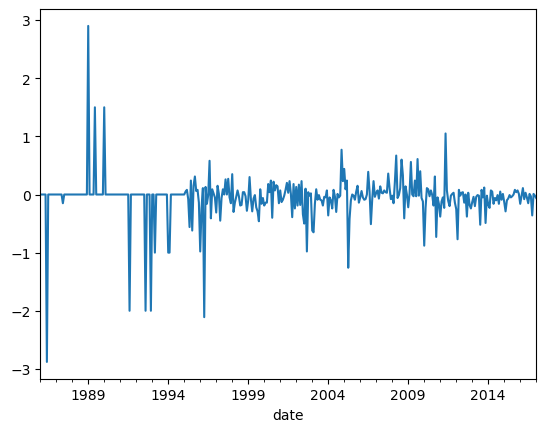

In [46]:
df['HPLR First Difference'].plot()

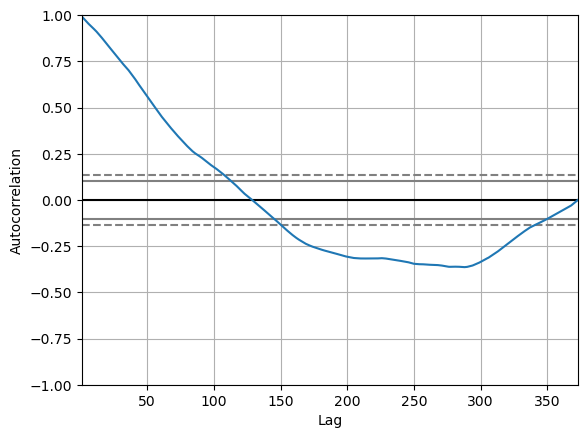

In [47]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['HPLR'])
plt.show()

In [48]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

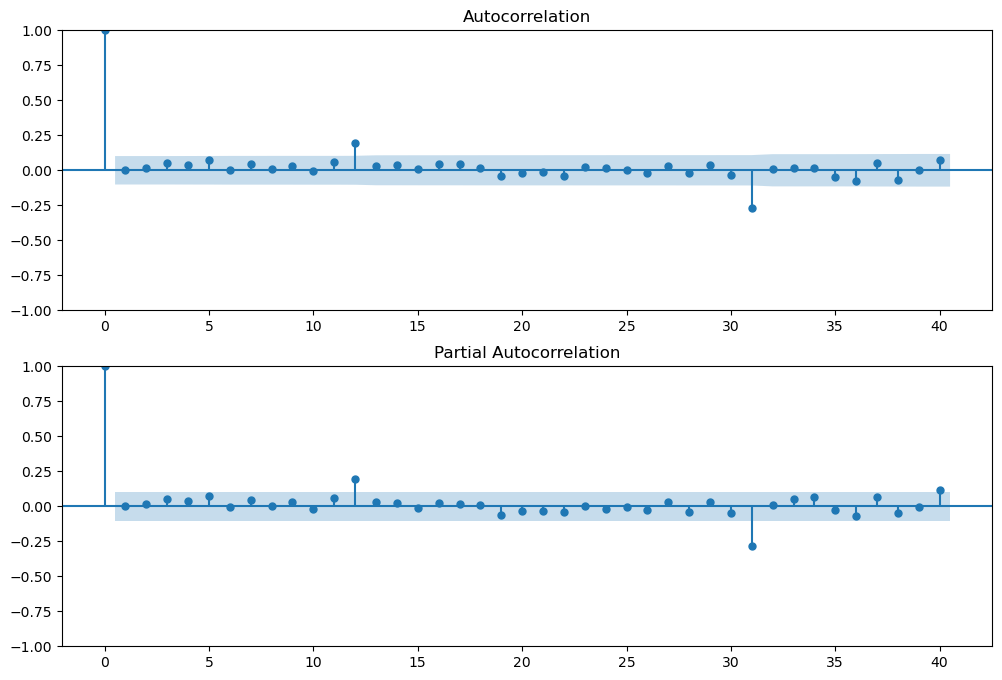

In [49]:
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['HPLR First Difference'].dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['HPLR First Difference'].dropna(),lags=40,ax=ax2)

In [50]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(df['HPLR'],order=(0,1,0))
model_fit=model.fit()
model_fit.summary()

C:\Users\bhavi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\bhavi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   HPLR   No. Observations:                  373
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -184.500
Date:                Fri, 30 Dec 2022   AIC                            370.999
Time:                        14:18:23   BIC                            374.918
Sample:                    01-01-1986   HQIC                           372.556
                         - 01-01-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.1579      0.003     47.029      0.000       0.151       0.164
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              7583.14
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):               0.17   Skew:                            -1.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        25.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

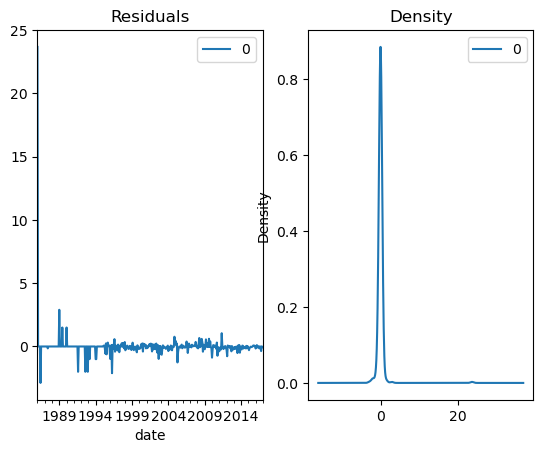

In [51]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2) 
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1]) 
plt.show()

In [ ]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_predict

In [ ]:
fig, ax = plt.subplots()
ax = df['HPLR'].plot(ax=ax)
df['forecast']= plot_predict(model_fit,"1987","2018",ax=ax, dynamic=False)
plt.xlabel('year')
plt.ylabel('Personal Loan Rate')
plt.title('HPLR VS Forecast') 
plt.show()

In [ ]:
size=int(len(df)*0.70)
train = df.HPLR[:size]
test=df.HPLR[size:]
train. shape, test.shape

In [ ]:
model= ARIMA(train, order=(0,1,0))
model_fit=model.fit() 
model_fit.summary()

In [ ]:
fig, ax = plt.subplots()
ax = train.plot(ax=ax)
plot_predict(model_fit,"1987","2007",ax=ax,dynamic=False)
plt.title("Performance Evaluation of Training Data")
plt.xlabel('Year')
plt.ylabel('HPLR')
plt.show()

In [ ]:
model=ARIMA(test,order=(0,1,0))
model_fit_test=model.fit()
model_fit_test.summary()

In [ ]:
test.plot()

In [ ]:
fig, ax = plt.subplots()
ax = test.plot(ax=ax)
plot_predict(model_fit_test,"2008","2017",ax =ax,dynamic=False)
plt.title("Performance Evaluation of test data")
plt.xlabel('Year')
plt.ylabel('HPLR')
plt.show()

In [ ]:
size=int(len(df)*0.70)
train = df.HPLR[:size]
test=df.HPLR[size:]
history = [x for x in train]
predictions = [] 
for t in range(len(test)):
    model=ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output=model_fit.forecast()
    yhat=output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
test.plot( label='original HPLR')
plt.plot(predictions,color='red',label='predicted HPLR')
plt.title('Performance Evaluation') 
plt.xlabel("Year")
plt.ylabel( "HPLR")
plt.legend()
plt.show()


In [ ]:
import math
error = mean_squared_error(test, predictions) 
print("Test Root Mean Squared Error:", math.sqrt(error))
print("r2_score: ", r2_score(test, predictions))


In [ ]:
model = pm.auto_arima(df.HPLR, start_p=1, start_q=1, 
                       test='adf',
                       max_p=3, 
                       max_q=3,
                       m=1,d=None,
                       seasonal=False,
                       start_P=0,
                       D=0,
                       trace=True,
                       error_action='ignore', 
                       suppress_warnings=True, 
                       stepwise=True)
print(model.summary())

In [ ]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

In [ ]:
n_periods = 12
fitted, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = pd.date_range(df.index[-1], periods = n_periods, freq='MS')
fitted_series=pd.DataFrame({"fitted": fitted, "date":pd.to_datetime(index_of_fc)})
fitted_series.set_index('date',inplace=True)
lower_series = pd.Series (confint[:, 0], index=index_of_fc)
upper_series = pd.Series (confint[:, 1], index=index_of_fc)
plt.plot(df.HPLR)
plt.plot(fitted_series, color= 'darkgreen') 
plt.fill_between(lower_series.index,
                 lower_series,
                  upper_series,
                  color='k',
                  alpha=.15)

plt.title("ARIMA Final Forecast of Personal Loan Rate")
plt.xlabel('year')
plt.ylabel('percent per annum')
plt.show()
fitted_series